### imports

In [ ]:
#imports 

import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

### download the dataset from Kaggle

In [1]:
#!pip install opendatasets
import opendatasets as od

dataset= "https://www.kaggle.com/datasets/sriramm2010/uci-bike-sharing-data/download?datasetVersionNumber=1"
#"https://www.kaggle.com/datasets/zhangyunsheng/defects-class-and-location/download?datasetVersionNumber=1"
#od.download(dataset)

100%|██████████| 286k/286k [00:04<00:00, 72.6kB/s]

### visualize the data

In [195]:
# constructing a dictionary for assigning purposes 
# structure  : {image_id : (path_of_image,
#                           path of xml file)
#              } 
# example : {img_01_3436789500_00004.jpg : ('.\\dataset\\images\\images\\crease\\img_01_3436789500_00004.jpg',
#                                           '.\\dataset\\label\\label\\img_01_3436789500_00004.xml')
#           }

image_directory = os.path.join('.','dataset','images','images')
xml_directory = os.path.join('.','dataset','label','label')
image_path_pair = {}
for folder in os.listdir(image_directory):
    
    for image in os.listdir(os.path.join(image_directory,folder)):
        
        img_path = os.path.join(image_directory, folder, image)
        xml_path = os.path.join(xml_directory, image.replace('jpg','xml'))
        
        if os.path.exists(img_path) and os.path.exists(xml_path):
            image_path_pair[image]= (img_path,xml_path)
    
# for i,j in list(image_path_pair.items())[:3]:
#     print(i,j)
        

In [196]:
#sanity check 

for img,paths in list(image_path_pair.items()):
    if not os.path.exists(paths[0]):
        print(f'img doesnt exist {paths[0]}')
    if not os.path.exists(paths[1]):
        print(f'xml doesnt exist {paths[1]}')        

In [197]:
xml_directory = os.path.join('.','dataset','label','label')
named = []
for xml_file in  os.listdir(xml_directory):
    if '.ipynb' not in xml_file:
        tree_path = os.path.join(xml_directory,xml_file)
        tree = ET.parse(tree_path)
        root = tree.getroot()

        objects = root.findall('object')

        for obj in objects:
            name = obj.find('name').text
            named.append(name)
named = list(set(named))
items_to_remove = ['10_yaozhe','d']
defect_types = [i for i in named if i not in items_to_remove]
defect_types = sorted(defect_types)
defect_types

['10_yaozhed',
 '1_chongkong',
 '2_hanfeng',
 '3_yueyawan',
 '4_shuiban',
 '5_youban',
 '6_siban',
 '7_yiwu',
 '8_yahen',
 '9_zhehen']

In [178]:
with open('./dataset/label/label/img_01_3402617700_00001.xml') as f:
    file = ''.join(f.readlines())
    print(file)
    if 'yueyawan' in file:
        print('nice')

<annotation>
	<folder>3</folder>
	<filename>img_01_3402617700_00001.jpg</filename>
	<path>E:\002_Data\suface dectect\2-fuxinzhe\msos1\3\img_01_3402617700_00001.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>2048</width>
		<height>1000</height>
		<depth>1</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>3_yueyawan</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>1738</xmin>
			<ymin>806</ymin>
			<xmax>1948</xmax>
			<ymax>993</ymax>
		</bndbox>
	</object>
</annotation>

nice


In [275]:
#np.random.seed(10)

def visualize_data(dictionary:dict = image_path_pair,
                   defect_type = '4_shuiban' ,
                   show_new_data_point = True) -> None:
    """
    dictionary : dict
        default_value = image_path_pair
        the dictionary that contains the structure {'img_id' : (image_path,xml_path)}
    
    defect type :str
        default_value = 'random'
        of of 10 defect types avaliable in the dataset to choose from:
         punching / welding_line / crescent_gap / water_spot / oil_spot / silk_spot / inclusion
         rolled_pit / crease / waist
    show_new_data_point: bool
        default_value = True
        if value is True, the function shows a different data point each time it runs 
        if False, the functions stays on the first data point it showed 
    
    """
    if defect_type == 'random':
        index = np.random.randint(0, len(dictionary))
        xml_path = list(image_path_pair.items())[index][1][1]
        image_path = list(image_path_pair.items())[index][1][0]

    else: 
        list_to_randomize_from=[]
        for image_id, path_info in dictionary.items():
            with open(path_info[1]) as f:
                xml = ''.join(f.readlines())
                if defect_type in xml:
                    list_to_randomize_from.append((image_id))
        if not show_new_data_point:
            np.random.seed(0)
        random_id =  np.random.choice(list_to_randomize_from) 
        image_path =  image_path_pair[random_id][0]
        xml_path = image_path_pair[random_id][1]
        
    tree_path = xml_path
    tree = ET.parse(tree_path)
    root = tree.getroot()

    # Access and extract information from the XML elements
    folder = root.find('folder').text
    filename = root.find('filename').text
    path = root.find('path').text

    width = int(root.find('size/width').text)
    height = int(root.find('size/height').text)
    depth = int(root.find('size/depth').text)

    objects = root.findall('object')

    # Load the image
    image = Image.open(image_path)

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image,cmap='gray') #cmap='gray'

    # Plot bounding boxes
    for obj in objects:
        name = obj.find('name').text

        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        # Create a Rectangle patch
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')

        # Add the patch to the axes
        ax.add_patch(rect)
        ax.text(xmin, ymin, name, color='r', verticalalignment='top')

    # Set axis labels and title
    plt.axis('off')
    plt.title(f"Image with Bounding Boxes: {filename}")

    # Show the image with bounding boxes
    plt.show()
    


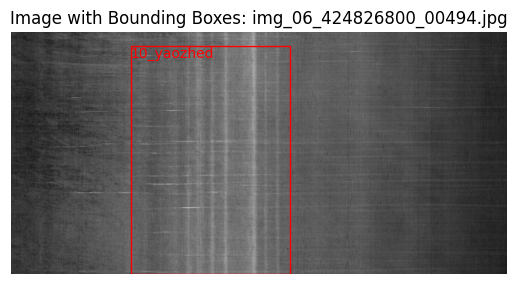

In [280]:
visualize_data(defect_type='10_yaozhed')

In [261]:
{ '1_chongkong' : ('punching_hole','Stanzen'),
  '2_hanfneg' : ('welding_line','Schweißbahn'),
  '3_yueyawan' : ('crescent_gap','sichelspalt'),
  '4_shuiban' : ('water_spot','wasserfleck'),
  '5_youban': ('oil_spot','ölfleck'),
  '6_siban': ('silk_spot','seidenfleck'),
  '7_yiwu' : ('inclusion','einschlüss'),
  '8_yahen' : ('rolled_pit','gewalzte_grube'),
  '9_zhehen' : ('crease','falten'),
  '10_yaozhed' : ('waist_folding','taillenfalten')
}

{'1_chongkong': ('punching', 'Stanzen'),
 '2_hanfneg': ('welding_line', 'Schweißbahn'),
 '3_yueyawan': ('crescent_gap', 'sichelspalt'),
 '4_shuiban': ('water_spot', 'wasserfleck'),
 '5_youban': ('oil_spot', 'ölfleck'),
 '6_siban': ('silk_spot', 'seidenfleck'),
 '7_yiwu': ('inclusion', 'einschlüss'),
 '9_zhehen': ('', ''),
 '10_yaozhed': ()}

In [ ]:
• Punching
• Welding line
• Crescent gap
• Water spot
• Oil spot
• silk spot 
• Inclusion
• Rolled pit
• Crease
• Waist